In [3]:
import networkx as nx

# Load the dataset
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)


In [4]:
import random

# Convert NodeView to list and select initial innovators
nodes = list(G.nodes())
initial_innovators = random.sample(nodes, 10)  # 10 initial innovators


In [5]:
def simulate_cascade(G, initial_innovators, threshold):
    adoption = set(initial_innovators)
    new_adoption = set(initial_innovators)
    while new_adoption:
        next_adoption = set()
        for node in G.nodes():
            if node not in adoption:
                neighbors = set(G.neighbors(node))
                adopted_neighbors = neighbors & adoption
                if len(adopted_neighbors) / len(neighbors) >= threshold:
                    next_adoption.add(node)
        adoption.update(new_adoption)
        new_adoption = next_adoption
    return adoption

# Simulate with a threshold of 0.1
result = simulate_cascade(G, initial_innovators, 0.1)


In [6]:
print(f"Total adopters: {len(result)}")
print(f"Percentage of network: {len(result) / G.number_of_nodes() * 100}%")


Total adopters: 3294
Percentage of network: 81.55484030700669%


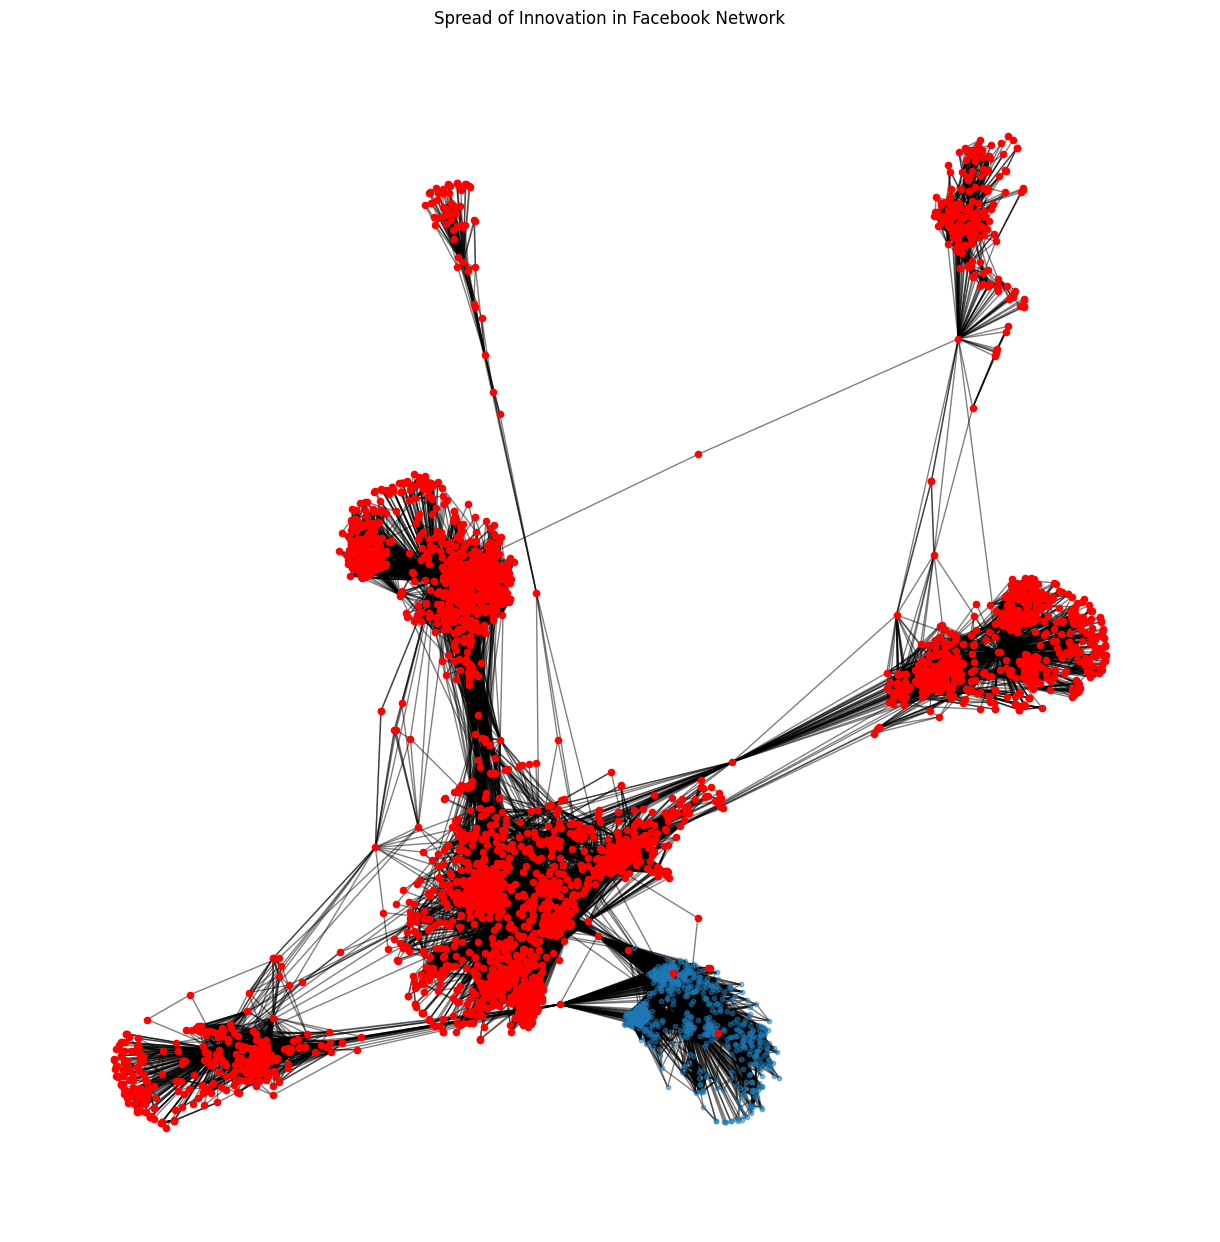

In [7]:
import matplotlib.pyplot as plt

# Plot the network and highlight adopters
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=10, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=list(result), node_color='r', node_size=20)
plt.title("Spread of Innovation in Facebook Network")
plt.show()


In [8]:
import networkx as nx

# Load the Facebook network dataset
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 4039
Number of edges: 88234


In [9]:
import random

# SIR model parameters
beta = 0.3  # Adoption rate
gamma = 0.1  # Recovery rate
initial_infected_fraction = 0.01  # Initial fraction of infected nodes

# Initialize node states: 0 -> Susceptible, 1 -> Infected, 2 -> Recovered
for node in G.nodes():
    G.nodes[node]['state'] = 0  # Susceptible

# Convert NodeView to list and infect a random fraction of nodes initially
nodes_list = list(G.nodes())
initial_infected = random.sample(nodes_list, int(initial_infected_fraction * G.number_of_nodes()))
for node in initial_infected:
    G.nodes[node]['state'] = 1  # Infected


In [10]:
def simulate_sir(G, beta, gamma, steps):
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []

    for step in range(steps):
        new_infected = []
        new_recovered = []

        for node in G.nodes():
            if G.nodes[node]['state'] == 0:  # Susceptible
                neighbors = list(G.neighbors(node))
                infected_neighbors = sum(1 for neighbor in neighbors if G.nodes[neighbor]['state'] == 1)
                if random.random() < 1 - (1 - beta) ** infected_neighbors:
                    new_infected.append(node)
            elif G.nodes[node]['state'] == 1:  # Infected
                if random.random() < gamma:
                    new_recovered.append(node)

        for node in new_infected:
            G.nodes[node]['state'] = 1
        for node in new_recovered:
            G.nodes[node]['state'] = 2

        susceptible_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 0)
        infected_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 1)
        recovered_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 2)

        susceptible_counts.append(susceptible_count)
        infected_counts.append(infected_count)
        recovered_counts.append(recovered_count)

    return susceptible_counts, infected_counts, recovered_counts


In [11]:
steps = 50
susceptible_counts, infected_counts, recovered_counts = simulate_sir(G, beta, gamma, steps)


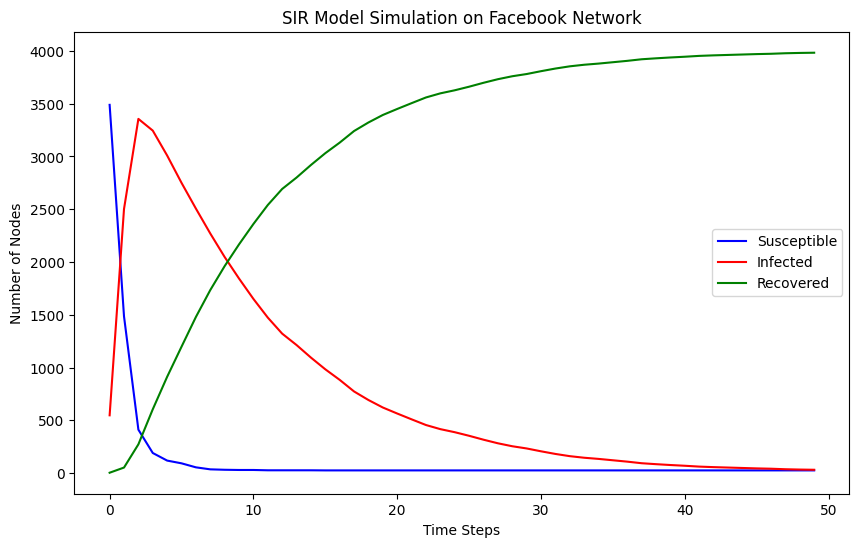

In [12]:
import matplotlib.pyplot as plt

# Custom colors
susceptible_color = 'blue'
infected_color = 'red'
recovered_color = 'green'

plt.figure(figsize=(10, 6))
plt.plot(range(steps), susceptible_counts, label='Susceptible', color=susceptible_color)
plt.plot(range(steps), infected_counts, label='Infected', color=infected_color)
plt.plot(range(steps), recovered_counts, label='Recovered', color=recovered_color)
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('SIR Model Simulation on Facebook Network')
plt.legend()
plt.show()



Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784
Network density: 0.010819963503439287

Top 5 nodes by degree centrality:
[(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]

Top 5 nodes by betweenness centrality:
[(107, 0.4805180785560152), (1684, 0.3377974497301992), (3437, 0.23611535735892905), (1912, 0.2292953395868782), (1085, 0.14901509211665306)]

Top 5 nodes by closeness centrality:
[(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796)]

Top 5 nodes by eigenvector centrality:
[(1912, 0.09540696149067629), (2266, 0.08698327767886552), (2206, 0.08605239270584342), (2233, 0.08517340912756598), (2464, 0.08427877475676092)]

Number of communities detected: 16


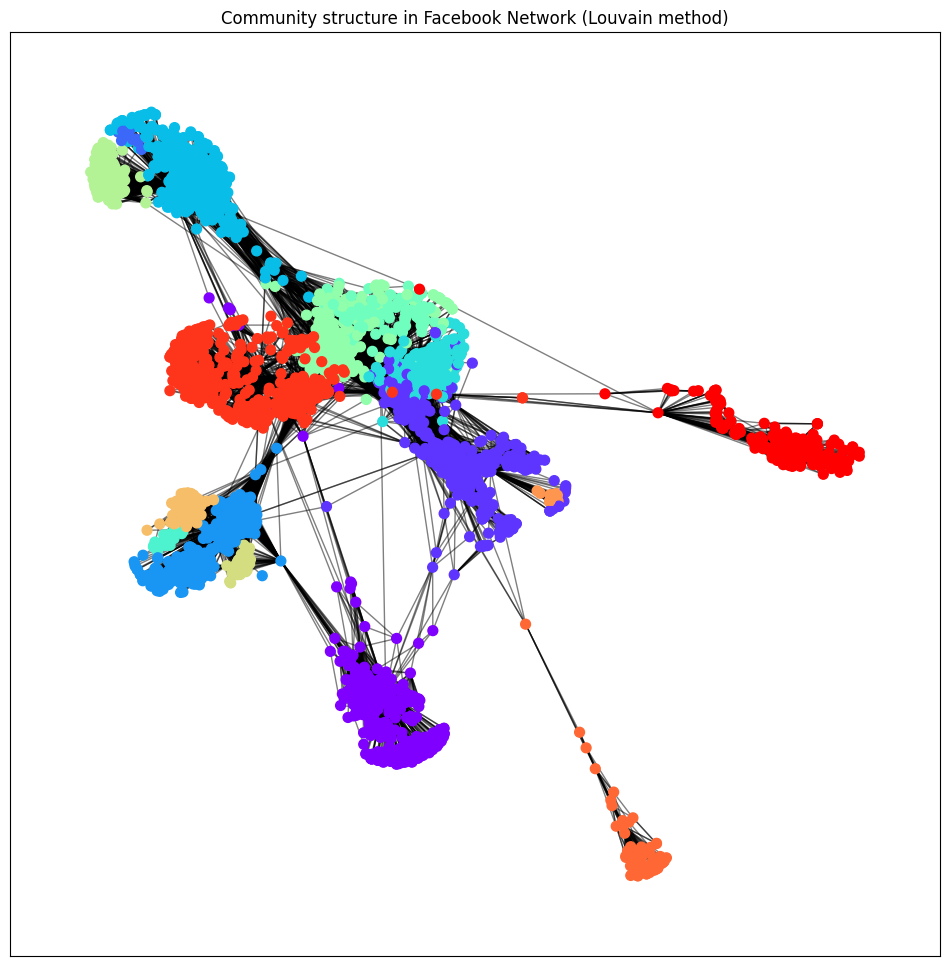


Average clustering coefficient: 0.6055467186200862

Average path length: 3.6925068496963913
Network diameter: 8


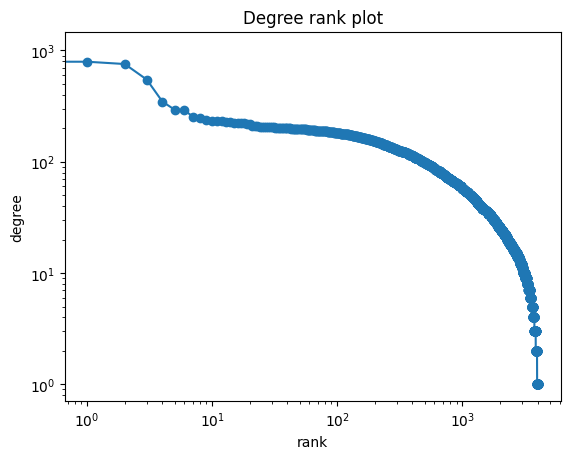

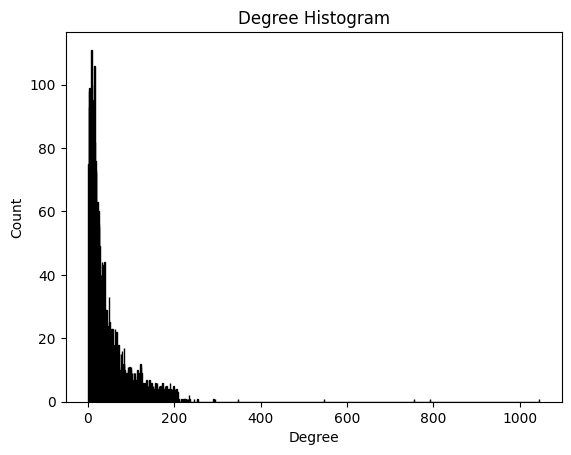

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Load the Facebook network dataset
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# Basic Network Analysis
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes()}")
print(f"Network density: {nx.density(G)}")

# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Display the top 5 nodes for each centrality measure
print("\nTop 5 nodes by degree centrality:")
print(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5])

print("\nTop 5 nodes by betweenness centrality:")
print(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5])

print("\nTop 5 nodes by closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5])

print("\nTop 5 nodes by eigenvector centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5])

# Community Detection using Louvain method
partition = community_louvain.best_partition(G)
print("\nNumber of communities detected:", len(set(partition.values())))

# Plotting the community structure
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes()]
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=50, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community structure in Facebook Network (Louvain method)")
plt.show()

# Clustering Coefficient
average_clustering = nx.average_clustering(G)
print(f"\nAverage clustering coefficient: {average_clustering}")

# Clustering coefficient for individual nodes
clustering_coefficients = nx.clustering(G)

# Path Analysis
average_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)

print(f"\nAverage path length: {average_path_length}")
print(f"Network diameter: {diameter}")

# Shortest paths
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Plot the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure()
plt.loglog(degree_sequence, marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

# Plot histogram of the degree distribution
plt.figure()
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1, 1), edgecolor='black')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
